In [4]:
%run ../imports.ipynb

from matplotlib.patches import Circle, Rectangle, Arc

C:\Users\Jason\AppData\Local\conda\conda\envs\DSI-6\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### EDA of Engineered Variables

In [5]:
df = pd.read_csv('../data/shots/shots_final.csv', compression='gzip')
df = df[main_features + features]
df.head()

,shot_rho,shot_angle,reb_rho,reb_angle,reb_height,reb_time,x,y,LOC_X,LOC_Y,ACTION_TYPE,SHOT_MADE_FLAG,SHOT_DISTANCE,PLAYER_ID,PLAYER_NAME,SHOT_TYPE,SHOT_ZONE_AREA,SHOT_ZONE_BASIC,SHOT_ZONE_RANGE,TEAM_NAME,TEAM_ID,EVENTTIME,GAME_EVENT_ID,GAME_DATE,HTM,VTM,GAME_ID
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,-1,Cutting Layup Shot,0,1,203145,Kent Bazemore,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,Atlanta Hawks,1610612737,609,138,20151027,ATL,DET,21500001
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2,2,Driving Finger Roll Layup Shot,0,0,203145,Kent Bazemore,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,Atlanta Hawks,1610612737,508,152,20151027,ATL,DET,21500001
2,25.25,226.44,2.54,212.14,13.03258,594.91,-180.1479,159.0252,-183,174,Jump Shot,0,25,203145,Kent Bazemore,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,Atlanta Hawks,1610612737,594,260,20151027,ATL,DET,21500001
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,-1,Cutting Layup Shot,1,1,203471,Dennis Schroder,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,Atlanta Hawks,1610612737,253,81,20151027,ATL,DET,21500001
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,2,Driving Layup Shot,0,1,203471,Dennis Schroder,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,Atlanta Hawks,1610612737,151,92,20151027,ATL,DET,21500001


In [6]:
features = ['LOC_X','LOC_Y','ACTION_TYPE','SHOT_MADE_FLAG','SHOT_DISTANCE','PLAYER_ID','PLAYER_NAME',
            'SHOT_TYPE','SHOT_ZONE_AREA','SHOT_ZONE_BASIC','SHOT_ZONE_RANGE','TEAM_NAME','TEAM_ID',
            'EVENTTIME','GAME_EVENT_ID','GAME_DATE','HTM','VTM','GAME_ID']
main_features = ['shot_rho','shot_angle','reb_rho','reb_angle','reb_height','reb_time','x','y']

In [199]:
df['SHOT_DISTANCE'].value_counts(normalize=True)[:24]

1     0.122232
0     0.113184
24    0.090655
2     0.088827
25    0.070764
23    0.042591
3     0.036136
18    0.031338
19    0.029396
17    0.028379
26    0.028002
4     0.027922
16    0.026185
6     0.022712
5     0.022130
20    0.021558
22    0.021501
15    0.020953
7     0.018919
8     0.017354
14    0.017354
13    0.015549
12    0.015309
9     0.015081
Name: SHOT_DISTANCE, dtype: float64

In [200]:
df['SHOT_ZONE_BASIC'].value_counts(normalize=True)

Restricted Area          0.360379
Mid-Range                0.236342
Above the Break 3        0.192517
In The Paint (Non-RA)    0.141666
Left Corner 3            0.034765
Right Corner 3           0.033520
Backcourt                0.000811
Name: SHOT_ZONE_BASIC, dtype: float64

In [7]:
df[['SHOT_MADE_FLAG','SHOT_ZONE_RANGE','SHOT_ZONE_AREA']].groupby(['SHOT_ZONE_RANGE','SHOT_ZONE_AREA']).mean().reset_index()

,SHOT_ZONE_RANGE,SHOT_ZONE_AREA,SHOT_MADE_FLAG
0,16-24 ft.,Center(C),0.396728
1,16-24 ft.,Left Side Center(LC),0.400313
2,16-24 ft.,Left Side(L),0.409071
3,16-24 ft.,Right Side Center(RC),0.402586
4,16-24 ft.,Right Side(R),0.414263
5,24+ ft.,Center(C),0.348272
6,24+ ft.,Left Side Center(LC),0.347481
7,24+ ft.,Left Side(L),0.377588
8,24+ ft.,Right Side Center(RC),0.353743
9,24+ ft.,Right Side(R),0.375256


In [8]:
df_display = df[['SHOT_MADE_FLAG','SHOT_ZONE_RANGE','ACTION_TYPE']].groupby(['SHOT_ZONE_RANGE','ACTION_TYPE']).count().reset_index()

In [203]:
df_display.shape

(122, 3)

In [9]:
percentages = df[['SHOT_MADE_FLAG','SHOT_ZONE_RANGE','ACTION_TYPE']].groupby(['SHOT_ZONE_RANGE','ACTION_TYPE']).mean().reset_index()['SHOT_MADE_FLAG']
df_display['SHOT_MADE_FLAG'] = df_display['SHOT_MADE_FLAG']/df_display['SHOT_MADE_FLAG'].sum()
df_display['FG%'] = percentages
df_display['FG%'] = df_display.apply(lambda row : (row['FG%']*3/2 if row['SHOT_ZONE_RANGE']=='24+ ft.' else row['FG%']), axis=1)
df_display.sort_values('SHOT_MADE_FLAG', ascending=False)[:40]

,SHOT_ZONE_RANGE,ACTION_TYPE,SHOT_MADE_FLAG,FG%
27,24+ ft.,Jump Shot,0.241837,0.519204
7,16-24 ft.,Jump Shot,0.113664,0.361946
94,Less Than 8 ft.,Layup Shot,0.103953,0.407627
82,Less Than 8 ft.,Driving Layup Shot,0.066412,0.610012
49,8-16 ft.,Jump Shot,0.059454,0.283436
93,Less Than 8 ft.,Jump Shot,0.046121,0.162745
9,16-24 ft.,Pullup Jump shot,0.024186,0.533774
115,Less Than 8 ft.,Tip Layup Shot,0.022701,0.468042
91,Less Than 8 ft.,Hook Shot,0.019639,0.470622
108,Less Than 8 ft.,Running Layup Shot,0.018051,0.722785


In [205]:
df['SHOT_ZONE_RANGE'].value_counts(normalize=True)

Less Than 8 ft.    0.452142
24+ ft.            0.260642
16-24 ft.          0.156255
8-16 ft.           0.129990
Back Court Shot    0.000971
Name: SHOT_ZONE_RANGE, dtype: float64

In [19]:
df['ACTION_TYPE'].value_counts(normalize=True)

Jump Shot                             0.461887
Layup Shot                            0.103953
Driving Layup Shot                    0.066412
Pullup Jump shot                      0.049389
Floating Jump shot                    0.024552
Hook Shot                             0.023900
Tip Layup Shot                        0.022701
Step Back Jump shot                   0.019193
Running Layup Shot                    0.018051
Dunk Shot                             0.017982
Turnaround Jump Shot                  0.016326
Cutting Layup Shot                    0.015823
Fadeaway Jump Shot                    0.012487
Driving Finger Roll Layup Shot        0.011093
Reverse Layup Shot                    0.010899
Putback Layup Shot                    0.010773
Running Jump Shot                     0.008614
Jump Bank Shot                        0.008580
Turnaround Hook Shot                  0.008112
Driving Floating Jump Shot            0.008077
Alley Oop Dunk Shot                   0.007655
Driving Dunk 

In [206]:
df.groupby(['SHOT_MADE_FLAG']).mean().reset_index()

,SHOT_MADE_FLAG,shot_rho,shot_angle,reb_rho,reb_angle,reb_height,reb_time,x,y,LOC_X,LOC_Y,SHOT_DISTANCE,PLAYER_ID,TEAM_ID,EVENTTIME,GAME_EVENT_ID,GAME_DATE,GAME_ID
0,0,18.971569,181.591949,5.978310,180.453432,10.706679,354.157991,-2.786159,112.008003,-3.335800,87.459591,13.418930,241682.126041,1.610613e+09,351.587461,257.908397,2.015274e+07,2.150030e+07
1,1,18.406866,180.710547,2.616317,178.954372,9.556438,363.727504,-1.314818,105.252529,-1.409673,61.885728,9.649102,238145.047040,1.610613e+09,354.422559,255.219862,2.015274e+07,2.150030e+07


In [8]:
(87530-53542)/87530 
# 33988 or 39% of all shots came within restricted circle, 4 feet from hoop
# due to noisy, hard to decipher rebounding within the circle, I'll constrain analysis to outside of it
# 45% - 39% = 6% of shots are btwn 5 and 8 feet

0.38830115389009484

In [13]:
df.dropna(inplace=True)
df_miss = df[df['SHOT_MADE_FLAG']==0]
df_miss.shape

(33193, 27)

In [14]:
df_make = df[df['SHOT_MADE_FLAG']==1]
df_make.describe()

,shot_rho,shot_angle,reb_rho,reb_angle,reb_height,reb_time,x,y,LOC_X,LOC_Y,SHOT_MADE_FLAG,SHOT_DISTANCE,PLAYER_ID,TEAM_ID,EVENTTIME,GAME_EVENT_ID,GAME_DATE,GAME_ID
count,20349.000000,20349.000000,20349.000000,20349.000000,20349.000000,20349.000000,20349.000000,20349.000000,20349.000000,20349.000000,20349.0,20349.000000,2.034900e+04,2.034900e+04,20349.000000,20349.000000,2.034900e+04,2.034900e+04
mean,18.406866,180.710547,2.616317,178.954372,9.556438,363.727504,-1.314818,105.252529,-2.812423,114.971891,1.0,17.924566,2.272597e+05,1.610613e+09,362.447246,252.178633,2.015266e+07,2.150030e+07
std,6.590011,53.749822,5.879673,68.715977,1.764016,204.723778,111.397565,89.222178,135.180709,82.006432,0.0,6.579574,3.067219e+05,8.656746e+00,204.609065,158.902367,3.342865e+03,1.689937e+02
min,5.000000,70.940000,0.010000,0.010000,1.025990,0.100000,-242.309000,-104.147300,-250.000000,-46.000000,1.0,5.000000,7.080000e+02,1.610613e+09,0.000000,2.000000,2.015103e+07,2.150000e+07
25%,13.510000,139.120000,0.520000,133.290000,9.797860,187.600000,-77.437500,26.893700,-115.000000,41.000000,1.0,13.000000,2.007680e+05,1.610613e+09,186.000000,111.000000,2.015112e+07,2.150015e+07
50%,19.370000,180.220000,0.830000,177.320000,9.958070,368.190000,-0.365500,96.121200,-1.000000,116.000000,1.0,19.000000,2.019770e+05,1.610613e+09,367.000000,253.000000,2.015121e+07,2.150030e+07
75%,24.420000,223.070000,1.290000,222.530000,10.093380,542.410000,77.560000,174.087900,109.000000,183.000000,1.0,24.000000,2.030950e+05,1.610613e+09,541.000000,384.000000,2.015122e+07,2.150044e+07
max,49.300000,292.780000,47.050000,359.990000,18.022210,713.600000,273.060500,422.104500,250.000000,493.000000,1.0,49.000000,1.626273e+06,1.610613e+09,712.000000,849.000000,2.016012e+07,2.150060e+07


In [15]:
df_make[main_features + ['SHOT_ZONE_RANGE','SHOT_ZONE_AREA']].groupby(['SHOT_ZONE_RANGE','SHOT_ZONE_AREA']).mean().reset_index()

,SHOT_ZONE_RANGE,SHOT_ZONE_AREA,shot_rho,shot_angle,reb_rho,reb_angle,reb_height,reb_time,x,y
0,16-24 ft.,Center(C),18.928686,179.243531,1.780988,181.630507,9.763942,376.505326,0.403901,150.190315
1,16-24 ft.,Left Side Center(LC),19.011118,216.326403,2.500039,157.938116,9.581342,375.024355,-81.660196,132.061096
2,16-24 ft.,Left Side(L),18.562988,255.316822,2.732302,164.744952,9.538058,381.741742,-125.298255,59.079077
3,16-24 ft.,Right Side Center(RC),18.925609,143.789455,2.352069,199.296602,9.601289,375.170015,81.985302,134.618390
4,16-24 ft.,Right Side(R),18.324797,104.803101,2.845544,193.589532,9.525807,361.202418,130.356751,69.342874
5,24+ ft.,Center(C),25.197728,179.394093,1.951191,177.722649,9.758267,342.351554,4.148432,186.113168
6,24+ ft.,Left Side Center(LC),25.559569,220.122311,2.937140,161.034512,9.578254,354.035114,-110.446674,147.819319
7,24+ ft.,Left Side(L),23.631384,266.940957,3.060653,171.179173,9.638739,358.873394,-145.121838,42.660592
8,24+ ft.,Right Side Center(RC),25.167100,141.128673,2.637596,199.364594,9.570426,354.925290,107.124715,151.421743
9,24+ ft.,Right Side(R),23.283115,93.787911,2.897284,186.853243,9.628579,363.714496,143.393910,49.690433


In [16]:
df_miss.describe()

,shot_rho,shot_angle,reb_rho,reb_angle,reb_height,reb_time,x,y,LOC_X,LOC_Y,SHOT_MADE_FLAG,SHOT_DISTANCE,PLAYER_ID,TEAM_ID,EVENTTIME,GAME_EVENT_ID,GAME_DATE,GAME_ID
count,33193.000000,33193.000000,33193.000000,33193.000000,33193.000000,33193.000000,33193.000000,33193.000000,33193.000000,33193.000000,33193.0,33193.000000,3.319300e+04,3.319300e+04,33193.000000,33193.000000,3.319300e+04,3.319300e+04
mean,18.971569,181.591949,5.978310,180.453432,10.706679,354.157991,-2.786159,112.008003,-4.539391,120.442232,0.0,18.486820,2.368558e+05,1.610613e+09,353.130509,257.666406,2.015270e+07,2.150030e+07
std,6.895882,53.485080,7.247411,58.337545,2.177146,207.853116,116.215843,88.651468,136.740393,86.737112,0.0,6.889909,3.261286e+05,8.691724e+00,207.871267,160.383078,3.380832e+03,1.708871e+02
min,5.000000,16.390000,0.000000,1.610000,0.494890,0.170000,-268.205100,-102.273000,-250.000000,-51.000000,0.0,5.000000,7.080000e+02,1.610613e+09,0.000000,2.000000,2.015103e+07,2.150000e+07
25%,14.050000,140.400000,2.280000,132.350000,9.976310,174.190000,-87.835800,33.438300,-120.000000,41.000000,0.0,14.000000,2.007940e+05,1.610613e+09,173.000000,118.000000,2.015112e+07,2.150015e+07
50%,20.260000,180.820000,3.710000,180.130000,10.609480,356.190000,-1.837600,101.210100,-2.000000,124.000000,0.0,20.000000,2.023220e+05,1.610613e+09,355.000000,257.000000,2.015120e+07,2.150030e+07
75%,24.690000,223.750000,6.300000,228.250000,11.974610,534.420000,81.312600,179.073500,109.000000,193.000000,0.0,24.000000,2.031140e+05,1.610613e+09,533.000000,391.000000,2.015122e+07,2.150044e+07
max,85.690000,296.200000,48.220000,359.610000,18.351010,714.730000,279.803600,422.356300,250.000000,847.000000,0.0,85.000000,1.626273e+06,1.610613e+09,712.000000,860.000000,2.016012e+07,2.150060e+07


In [17]:
df_miss[main_features + ['SHOT_ZONE_RANGE','SHOT_ZONE_AREA']].groupby(['SHOT_ZONE_RANGE','SHOT_ZONE_AREA']).mean().reset_index()

,SHOT_ZONE_RANGE,SHOT_ZONE_AREA,shot_rho,shot_angle,reb_rho,reb_angle,reb_height,reb_time,x,y
0,16-24 ft.,Center(C),19.053870,179.698254,5.728503,181.366418,10.962154,371.988181,0.714892,157.766640
1,16-24 ft.,Left Side Center(LC),19.137192,216.234494,5.972891,177.450574,10.815469,383.006743,-81.181796,140.673224
2,16-24 ft.,Left Side(L),18.568560,255.709956,6.291418,176.049561,10.589325,374.415899,-130.114026,65.544558
3,16-24 ft.,Right Side Center(RC),19.001067,143.876432,5.888978,184.231505,10.734811,371.676155,80.956989,138.560280
4,16-24 ft.,Right Side(R),18.431665,105.243903,5.456688,183.145819,10.835272,359.970662,139.322509,72.745195
5,24+ ft.,Center(C),25.302136,179.508087,6.187067,179.531939,11.272213,332.548497,1.448413,185.919478
6,24+ ft.,Left Side Center(LC),25.667714,219.875316,6.715564,176.344878,10.920565,336.666715,-102.986765,149.884814
7,24+ ft.,Left Side(L),23.677291,266.961352,5.946119,174.066262,11.108332,358.687080,-166.221748,43.501206
8,24+ ft.,Right Side Center(RC),25.246792,141.674394,6.540605,186.031946,11.038636,340.210531,101.048226,155.084316
9,24+ ft.,Right Side(R),23.329253,93.910295,5.826563,188.972673,11.109372,344.262444,154.717580,49.917864


In [55]:
df_miss[df_miss['SHOT_ZONE_AREA']=='Left Side(L)'].sort_values('shot_angle', ascending=False)
# Left side angle average is off because a few shots rightly have 355-360 degree values,
# they're beyond the horizontal of the backboard

,shot_rho,shot_angle,reb_rho,reb_angle,reb_height,reb_time,x,y,LOC_X,LOC_Y,ACTION_TYPE,SHOT_MADE_FLAG,SHOT_DISTANCE,PLAYER_ID,PLAYER_NAME,SHOT_TYPE,SHOT_ZONE_AREA,SHOT_ZONE_BASIC,SHOT_ZONE_RANGE,TEAM_NAME,TEAM_ID,EVENTTIME,GAME_EVENT_ID,GAME_DATE,HTM,VTM,GAME_ID
47321,24.6,359.77,3.68,122.50,12.05875,652.95,-223.6251,-2.0937,-246,-1,Jump Shot,0,24,201988,Patty Mills,3PT Field Goal,Left Side(L),Left Corner 3,24+ ft.,San Antonio Spurs,1610612759,652,130,20151209,TOR,SAS,21500323
75828,24.5,359.77,3.13,177.88,12.83706,510.50,-136.0450,185.1416,-245,-1,Jump Shot,0,24,203953,Jabari Parker,3PT Field Goal,Left Side(L),Left Corner 3,24+ ft.,Milwaukee Bucks,1610612749,510,35,20160104,MIL,SAS,21500516
33950,24.6,359.77,7.05,156.76,7.51520,505.86,59.2360,32.2154,-246,-1,Jump Shot,0,24,2772,Trevor Ariza,3PT Field Goal,Left Side(L),Left Corner 3,24+ ft.,Houston Rockets,1610612745,502,162,20151127,HOU,PHI,21500232
16392,24.8,359.77,6.25,20.00,9.82028,191.42,-225.2722,2.5766,-248,-1,Jump Shot,0,24,203095,Evan Fournier,3PT Field Goal,Left Side(L),Left Corner 3,24+ ft.,Orlando Magic,1610612753,191,204,20151111,ORL,LAL,21500114
52431,24.5,359.77,3.18,64.62,10.59021,165.54,-228.7041,8.7558,-245,-1,Jump Shot,0,24,203082,Terrence Ross,3PT Field Goal,Left Side(L),Left Corner 3,24+ ft.,Toronto Raptors,1610612761,164,473,20151214,IND,TOR,21500357
929,24.5,359.77,1.67,70.64,13.19163,329.16,-55.5231,-2.1341,-245,-1,Jump Shot,0,24,201229,Anthony Tolliver,3PT Field Goal,Left Side(L),Left Corner 3,24+ ft.,Detroit Pistons,1610612765,326,162,20151028,DET,UTA,21500007
63437,24.5,359.77,3.22,167.63,11.55730,478.94,-104.8844,99.7086,-245,-1,Jump Shot,0,24,203937,Kyle Anderson,3PT Field Goal,Left Side(L),Left Corner 3,24+ ft.,San Antonio Spurs,1610612759,478,139,20151223,MIN,SAS,21500431
55076,24.0,359.76,30.18,71.10,5.33611,401.28,-52.5462,167.1209,-240,-1,Jump Shot,0,24,2581,Steve Blake,3PT Field Goal,Left Side(L),Left Corner 3,24+ ft.,Detroit Pistons,1610612765,399,491,20151216,DET,BOS,21500374
6136,23.5,359.76,8.76,0.61,14.44309,185.60,-145.3564,100.5405,-235,-1,Step Back Jump shot,0,23,200768,Kyle Lowry,3PT Field Goal,Left Side(L),Left Corner 3,24+ ft.,Toronto Raptors,1610612761,185,344,20151101,TOR,MIL,21500042
13788,23.5,359.76,8.00,51.30,11.89817,270.42,-181.6653,34.6232,-235,-1,Jump Shot,0,23,202335,Patrick Patterson,3PT Field Goal,Left Side(L),Left Corner 3,24+ ft.,Toronto Raptors,1610612761,268,77,20151108,MIA,TOR,21500096


In [190]:
df_miss.to_csv('misses_trainset.csv', index=True, header=True, compression='gzip')

In [188]:
df2 = pd.get_dummies(df_miss[['PLAYER_NAME','SHOT_ZONE_AREA']], columns=['SHOT_ZONE_AREA'], prefix='')
df2.head()

,PLAYER_NAME,_Back Court(BC),_Center(C),_Left Side Center(LC),_Left Side(L),_Right Side Center(RC),_Right Side(R)
2,Kent Bazemore,0,0,1,0,0,0
9,Dennis Schroder,0,0,1,0,0,0
11,Dennis Schroder,0,0,1,0,0,0
13,Dennis Schroder,0,1,0,0,0,0
15,Dennis Schroder,0,0,0,0,1,0


In [189]:
df2 = df2.groupby(['PLAYER_NAME']).sum().reset_index()
df2['total_shots'] = df2.drop('PLAYER_NAME', axis=1).sum(axis=1)
df2.sort_values('total_shots', ascending=False).head(100)

,PLAYER_NAME,_Back Court(BC),_Center(C),_Left Side Center(LC),_Left Side(L),_Right Side Center(RC),_Right Side(R),total_shots
316,Paul George,1,80,63,48,71,46,309
230,Kobe Bryant,1,63,70,37,80,51,302
49,CJ McCollum,0,81,65,50,58,37,291
160,James Harden,0,87,55,23,76,36,277
42,Brandon Knight,0,79,66,24,65,21,255
77,Damian Lillard,0,78,77,32,49,14,250
89,DeMar DeRozan,1,87,24,55,33,48,248
236,Kyle Lowry,1,74,63,29,61,19,247
192,John Wall,0,62,42,39,63,34,240
21,Andrew Wiggins,0,75,39,44,37,43,238


In [191]:
df2.to_csv('by_player.csv', index=False, header=True, compression='gzip')

### Unsupervised Learning with DBScan for Rebound Trajectories

In [78]:
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN, KMeans

import plot_code
%run plot_code.py

<Figure size 432x288 with 0 Axes>

In [139]:
# X = df_miss[df_miss['SHOT_TYPE']=='3PT Field Goal'][['reb_rho','reb_angle']]
X = df_miss[['reb_rho','reb_angle']]
X['reb_angle'] = (X['reb_angle'] + 90) % 360
df_temp = pd.DataFrame(data=X)
df_temp.describe()

C:\Users\Jason\AppData\Local\conda\conda\envs\DSI-6\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,reb_rho,reb_angle
count,33193.000000,33193.000000
mean,5.978310,179.547289
std,7.247411,58.337531
min,0.000000,0.390000
25%,2.280000,131.750000
50%,3.710000,179.870000
75%,6.300000,227.650000
max,48.220000,358.390000


In [140]:
ss = StandardScaler()
X = ss.fit_transform(X)

dbscan = DBSCAN(eps = .08, min_samples= 50).fit(X)
core_samples = dbscan.core_sample_indices_
labels       = dbscan.labels_

pd.Series(data=labels).value_counts()

 0    27938
-1     5255
dtype: int64

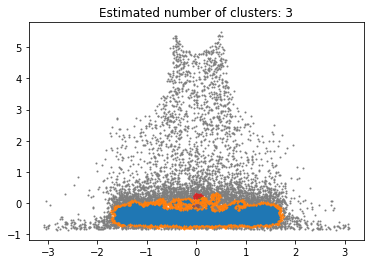

In [133]:
# All 3 pointers clustering
plot_dbscan(dbscan, X, features=[-1,0,1,2,3])

In [150]:
areas = set(df['SHOT_ZONE_AREA'])
areas.remove('Back Court(BC)')
distances = set(df['SHOT_ZONE_RANGE'])
distances.remove('Back Court Shot')
distances

{'16-24 ft.', '24+ ft.', '8-16 ft.', 'Less Than 8 ft.'}

In [151]:
areas

{'Center(C)',
 'Left Side Center(LC)',
 'Left Side(L)',
 'Right Side Center(RC)',
 'Right Side(R)'}

-1    1083
 0     590
 1     124
 2      97
dtype: int64
Left Side(L) 24+ ft.


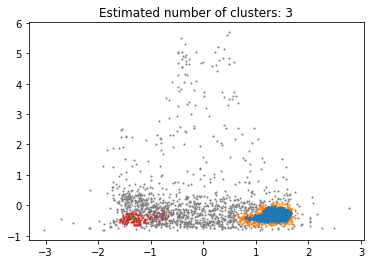

-1    1092
 0     276
dtype: int64
Left Side(L) 16-24 ft.


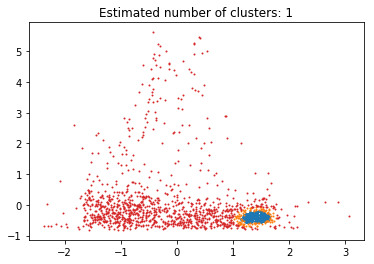

 0    845
 1    793
-1    785
dtype: int64
Left Side(L) 8-16 ft.


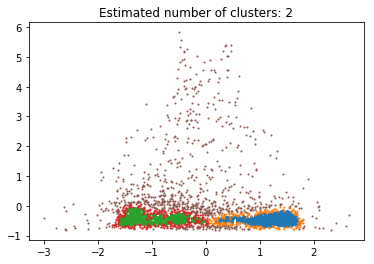

-1    1218
 0     546
 1      69
dtype: int64
Right Side(R) 24+ ft.


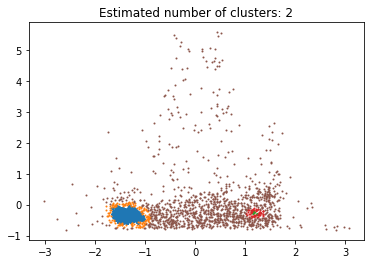

-1    881
 0    236
dtype: int64
Right Side(R) 16-24 ft.


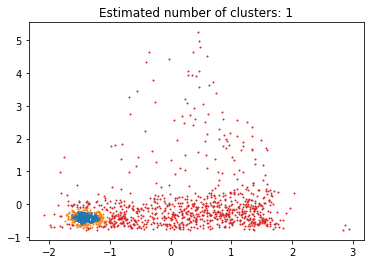

-1    877
 0    839
 1    608
dtype: int64
Right Side(R) 8-16 ft.


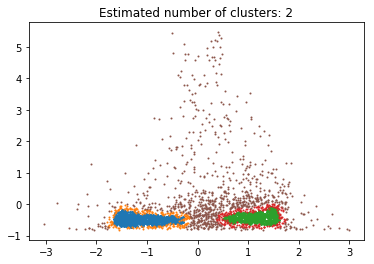

 0    3241
-1    1033
dtype: int64
Left Side Center(LC) 24+ ft.


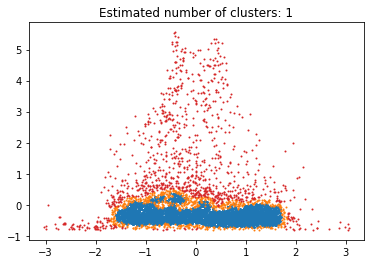

-1    1115
 0     530
 1     146
 2     125
dtype: int64
Left Side Center(LC) 16-24 ft.


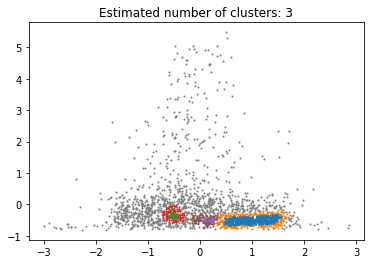

 0    2745
-1     933
 1     259
dtype: int64
Right Side Center(RC) 24+ ft.


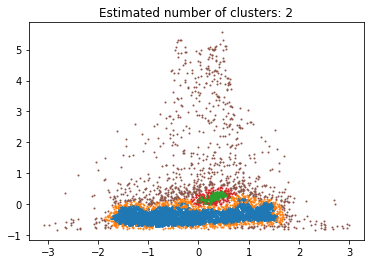

-1    1053
 0     656
 1     204
 2      74
dtype: int64
Right Side Center(RC) 16-24 ft.


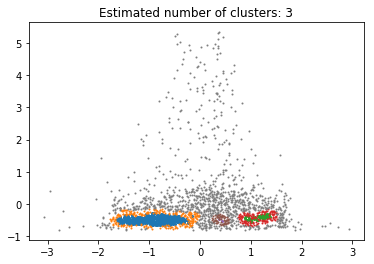

 0    2451
-1     963
dtype: int64
Center(C) Less Than 8 ft.


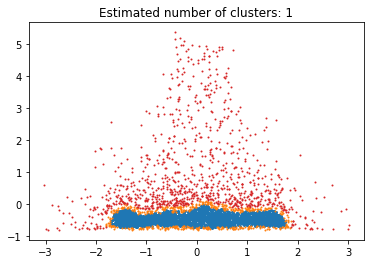

 0    1463
-1    1138
 1      75
 2      58
dtype: int64
Center(C) 24+ ft.


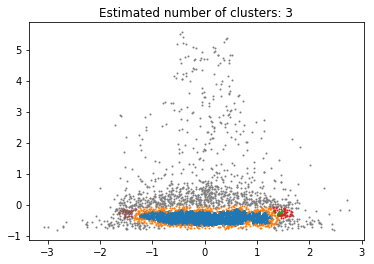

-1    1093
 0     542
 2      70
 1      65
dtype: int64
Center(C) 16-24 ft.


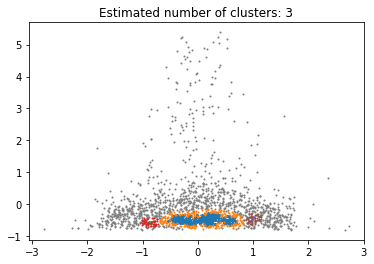

 0    1401
-1     719
dtype: int64
Center(C) 8-16 ft.


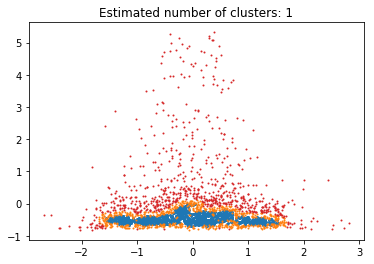

In [155]:
for shot_area in areas:
    for dist in distances:
        X = df_miss[(df_miss['SHOT_ZONE_AREA']==shot_area) & (df_miss['SHOT_ZONE_RANGE']==dist)][['reb_rho','reb_angle']]
        if X.shape[0] != 0 :
            X['reb_angle'] = (X['reb_angle'] + 90) % 360
            X = ss.transform(X)

            dbscan = DBSCAN(eps = .15, min_samples= 50).fit(X)
            core_samples = dbscan.core_sample_indices_
            labels       = dbscan.labels_

            print(pd.Series(data=labels).value_counts())
            print(shot_area, dist)

            plot_dbscan(dbscan, X, features=[-1,0,1,2,3,4,5])

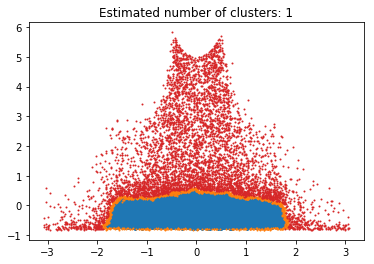

In [128]:
# All shots plotted
# plot_dbscan(dbscan, X, features=[-1,0,1,2,3])

### Creating Miss Quadrants for Categorical Classification

In [192]:
df_miss.head()

,shot_rho,shot_angle,reb_rho,reb_angle,reb_height,reb_time,x,y,LOC_X,LOC_Y,ACTION_TYPE,SHOT_MADE_FLAG,SHOT_DISTANCE,PLAYER_ID,PLAYER_NAME,SHOT_TYPE,SHOT_ZONE_AREA,SHOT_ZONE_BASIC,SHOT_ZONE_RANGE,TEAM_NAME,TEAM_ID,EVENTTIME,GAME_EVENT_ID,GAME_DATE,HTM,VTM,GAME_ID
2,25.25,43.56,2.54,57.86,13.03258,594.91,-180.1479,159.0252,-183,174,Jump Shot,0,25,203145,Kent Bazemore,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,Atlanta Hawks,1610612737,594,260,20151027,ATL,DET,21500001
9,25.63,39.78,2.20,78.74,11.14641,260.12,-196.4282,125.6403,-197,164,Jump Shot,0,25,203471,Dennis Schroder,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,Atlanta Hawks,1610612737,259,199,20151027,ATL,DET,21500001
11,25.06,52.95,3.13,120.84,12.46387,145.20,-150.8712,194.3433,-151,200,Jump Shot,0,25,203471,Dennis Schroder,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,Atlanta Hawks,1610612737,145,333,20151027,ATL,DET,21500001
13,24.42,92.35,4.87,32.33,9.99927,8.91,-0.8244,248.1302,10,244,Jump Shot,0,24,203471,Dennis Schroder,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,Atlanta Hawks,1610612737,7,355,20151027,ATL,DET,21500001
15,20.52,126.48,2.34,44.21,10.08177,541.37,104.3529,180.0479,122,165,Pullup Jump shot,0,20,203471,Dennis Schroder,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,Atlanta Hawks,1610612737,540,392,20151027,ATL,DET,21500001


In [194]:
def make_quadrant(row):
    n = 0
    if row['reb_rho'] < 5:
        if row['reb_angle'] < 90 : n = 4
        elif row['reb_angle'] < 180 : n = 1
        elif row['reb_angle'] < 270 : n = 2
        elif row['reb_angle'] <= 360 : n = 3
        
    elif row['reb_rho'] >= 5:
        if row['reb_angle'] < 90 : n = 12
        elif row['reb_angle'] < 120 : n = 5
        elif row['reb_angle'] < 150 : n = 6
        elif row['reb_angle'] < 180 : n = 7
        elif row['reb_angle'] < 210 : n = 8
        elif row['reb_angle'] < 240 : n = 9
        elif row['reb_angle'] < 270 : n = 10
        elif row['reb_angle'] <= 360 : n = 11
        
    return n

In [208]:
df_miss['quadrant'] = df_miss.apply(make_quadrant, axis=1)

C:\Users\Jason\AppData\Local\conda\conda\envs\DSI-6\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [210]:
df_miss.head()

,shot_rho,shot_angle,reb_rho,reb_angle,reb_height,reb_time,x,y,LOC_X,LOC_Y,ACTION_TYPE,SHOT_MADE_FLAG,SHOT_DISTANCE,PLAYER_ID,PLAYER_NAME,SHOT_TYPE,SHOT_ZONE_AREA,SHOT_ZONE_BASIC,SHOT_ZONE_RANGE,TEAM_NAME,TEAM_ID,EVENTTIME,GAME_EVENT_ID,GAME_DATE,HTM,VTM,GAME_ID,quadrant
2,25.25,226.44,2.54,212.14,13.03258,594.91,-180.1479,159.0252,-183,174,Jump Shot,0,25,203145,Kent Bazemore,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,Atlanta Hawks,1610612737,594,260,20151027,ATL,DET,21500001,2
9,25.63,230.22,2.20,191.26,11.14641,260.12,-196.4282,125.6403,-197,164,Jump Shot,0,25,203471,Dennis Schroder,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,Atlanta Hawks,1610612737,259,199,20151027,ATL,DET,21500001,2
11,25.06,217.05,3.13,149.16,12.46387,145.20,-150.8712,194.3433,-151,200,Jump Shot,0,25,203471,Dennis Schroder,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,Atlanta Hawks,1610612737,145,333,20151027,ATL,DET,21500001,1
13,24.42,177.65,4.87,237.67,9.99927,8.91,-0.8244,248.1302,10,244,Jump Shot,0,24,203471,Dennis Schroder,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,Atlanta Hawks,1610612737,7,355,20151027,ATL,DET,21500001,2
15,20.52,143.52,2.34,225.79,10.08177,541.37,104.3529,180.0479,122,165,Pullup Jump shot,0,20,203471,Dennis Schroder,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,Atlanta Hawks,1610612737,540,392,20151027,ATL,DET,21500001,2


In [211]:
df_miss.to_csv('misses_trainset.csv', index=True, header=True, compression='gzip')

### Miss Quadrants - Visualizing

In [ ]:
# Polar Conversions
###########################################
def cart2pol(row):
    x = row[0]
    y = row[1]
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    row = [rho,phi]
    return row

def pol2cart(row):
    rho = row[0]
    phi = row[1]
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    row = [x,y]
    return row


# Plot Shot Chart:http://savvastjortjoglou.com/nba-shot-sharts.html
#####################################################################
def plot_shot(data):
    plt.figure(figsize=(12,11))
    plt.scatter(data.LOC_X, data.LOC_Y, c=data.shot_zone_range_area, s=30)
    draw_court()
    # Adjust plot limits to just fit in half court
    plt.xlim(-250,250)
    # Descending values along th y axis from bottom to top
    # in order to place the hoop by the top of plot
    plt.ylim(422.5, -47.5)
    # get rid of axis tick labels
    # plt.tick_params(labelbottom=False, labelleft=False)
    plt.savefig('./data/img/half/fully_converted_with_range_areas.jpg')
    plt.close()

# Visualization of court: http://savvastjortjoglou.com/nba-shot-sharts.html
###########################################################################
def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

def label(file_name):
    # Load data and map location categories
    ###########################################
    dictionary_1 = {'Right Side(R)':1, 'Left Side(L)':2, 'Center(C)':3, 'Right Side Center(RC)':4, 'Left Side Center(LC)':5}
    dictionary_2 = {'Less Than 8 ft.':1, '8-16 ft.':2, '16-24 ft.':3, '24+ ft.':4}
    dictionary_3 = {'Restricted Area':1, 'In The Paint (Non-RA)':2, 'Mid-Range':3, 'Right Corner 3':4, 'Left Corner 3':5, 'Above the Break 3':6}

    data = pd.read_csv('./data/train/data.csv')
    data['shot_zone_area'] = data['shot_zone_area'].map(dictionary_1)
    data['shot_zone_range'] = data['shot_zone_range'].map(dictionary_2)
    data['SHOT_ZONE_BASIC'] = data['SHOT_ZONE_BASIC'].map(dictionary_3)

    data = data.dropna(subset = ['LOC_X','LOC_Y','shot_zone_area', 'shot_zone_range'])

    data['SHOT_ZONE_BASIC'] = data['SHOT_ZONE_BASIC'].astype(int)
    data['shot_zone_range'] = data['shot_zone_range'].astype(int)
    data['shot_zone_area'] = data['shot_zone_area'].astype(int)

    # Combine areas and ranges
    ###################################################
    data.loc[(data.shot_zone_area == 1) & (data.shot_zone_range == 1),'shot_zone_range_area'] = 1
    data.loc[(data.shot_zone_area == 1) & (data.shot_zone_range == 2),'shot_zone_range_area'] = 2
    data.loc[(data.shot_zone_area == 1) & (data.shot_zone_range == 3),'shot_zone_range_area'] = 3
    data.loc[(data.shot_zone_area == 1) & (data.shot_zone_range == 4),'shot_zone_range_area'] = 4

    data.loc[(data.shot_zone_area == 2) & (data.shot_zone_range == 1),'shot_zone_range_area'] = 5
    data.loc[(data.shot_zone_area == 2) & (data.shot_zone_range == 2),'shot_zone_range_area'] = 6
    data.loc[(data.shot_zone_area == 2) & (data.shot_zone_range == 3),'shot_zone_range_area'] = 7
    data.loc[(data.shot_zone_area == 2) & (data.shot_zone_range == 4),'shot_zone_range_area'] = 8

    data.loc[(data.shot_zone_area == 3) & (data.shot_zone_range == 1),'shot_zone_range_area'] = 9
    data.loc[(data.shot_zone_area == 3) & (data.shot_zone_range == 2),'shot_zone_range_area'] = 10
    data.loc[(data.shot_zone_area == 3) & (data.shot_zone_range == 3),'shot_zone_range_area'] = 11
    data.loc[(data.shot_zone_area == 3) & (data.shot_zone_range == 4),'shot_zone_range_area'] = 12

    data.loc[(data.shot_zone_area == 4) & (data.shot_zone_range == 1),'shot_zone_range_area'] = 13
    data.loc[(data.shot_zone_area == 4) & (data.shot_zone_range == 2),'shot_zone_range_area'] = 14
    data.loc[(data.shot_zone_area == 4) & (data.shot_zone_range == 3),'shot_zone_range_area'] = 15
    data.loc[(data.shot_zone_area == 4) & (data.shot_zone_range == 4),'shot_zone_range_area'] = 16

    data.loc[(data.shot_zone_area == 5) & (data.shot_zone_range == 1),'shot_zone_range_area'] = 17
    data.loc[(data.shot_zone_area == 5) & (data.shot_zone_range == 2),'shot_zone_range_area'] = 18
    data.loc[(data.shot_zone_area == 5) & (data.shot_zone_range == 3),'shot_zone_range_area'] = 19
    data.loc[(data.shot_zone_area == 5) & (data.shot_zone_range == 4),'shot_zone_range_area'] = 20

    # plot_shot(data)

    data = data.drop_duplicates(subset=['GAME_EVENT_ID','GAME_ID'], inplace=False)
    # data[['LOC_RHO','LOC_PHI']] = data[['LOC_X','LOC_Y']].apply(cart2pol, axis=1)

    X = data[['LOC_X','LOC_Y']]
    Y = data[['shot_zone_range_area']]
    train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=123)

    ####################################################################################
    # Train, Predict, Evaluate TODO: Serialize the classifier so code is more efficient
    ####################################################################################
    knn = KNeighborsClassifier(n_neighbors=4)
    knn.fit(train_x, train_y)
    predictions = knn.predict(test_x)

    # KNN is 99.56% accurate with single range, 99.07% accurate with two ranges
    print str(classification_report(test_y, predictions, digits=4))

    ######################################################################
    # Use KNN Model to label full converted movement set
    ######################################################################
    # read data and rename columns
    data = pd.read_csv('./data/converted/'+file_name)
    data[['LOC_X','LOC_Y']] = data[['x_loc','y_loc']]

    # predict and label shot zones
    X = data[['LOC_X','LOC_Y']]
    zones = knn.predict(X)
    data['shot_zone_range_area'] = zones
    plot_shot(data)